In [1]:
!nvidia-smi

Wed Dec 13 22:15:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:4F:00.0 Off |                  N/A |
| 30%   30C    P8    39W / 350W |   1284MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:52:00.0 Off |                  N/A |
| 30%   

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/mnt/hardDisk1/fay


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [4]:
# Pip install method (recommended)

# !pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.11.5 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)
Setup complete ✅ (128 CPUs, 282.8 GB RAM, 3515.1/3519.3 GB disk)


In [5]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [13]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="BI6TqadrIOLyjhRtWTJw")
project = rf.workspace("web-ksgfc").project("webelement")
dataset = project.version(3).download("yolov8")


mkdir: cannot create directory ‘/mnt/hardDisk1/fay/datasets’: File exists
/mnt/hardDisk1/fay/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to webelement-3 in yolov8:: 100%|█| 1294/1294 [0


## Custom Training

In [14]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/mnt/hardDisk1/fay
New https://pypi.org/project/ultralytics/8.0.227 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.11.5 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/mnt/hardDisk1/fay/datasets/webelement-3/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=F

In [15]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


/mnt/hardDisk1/fay


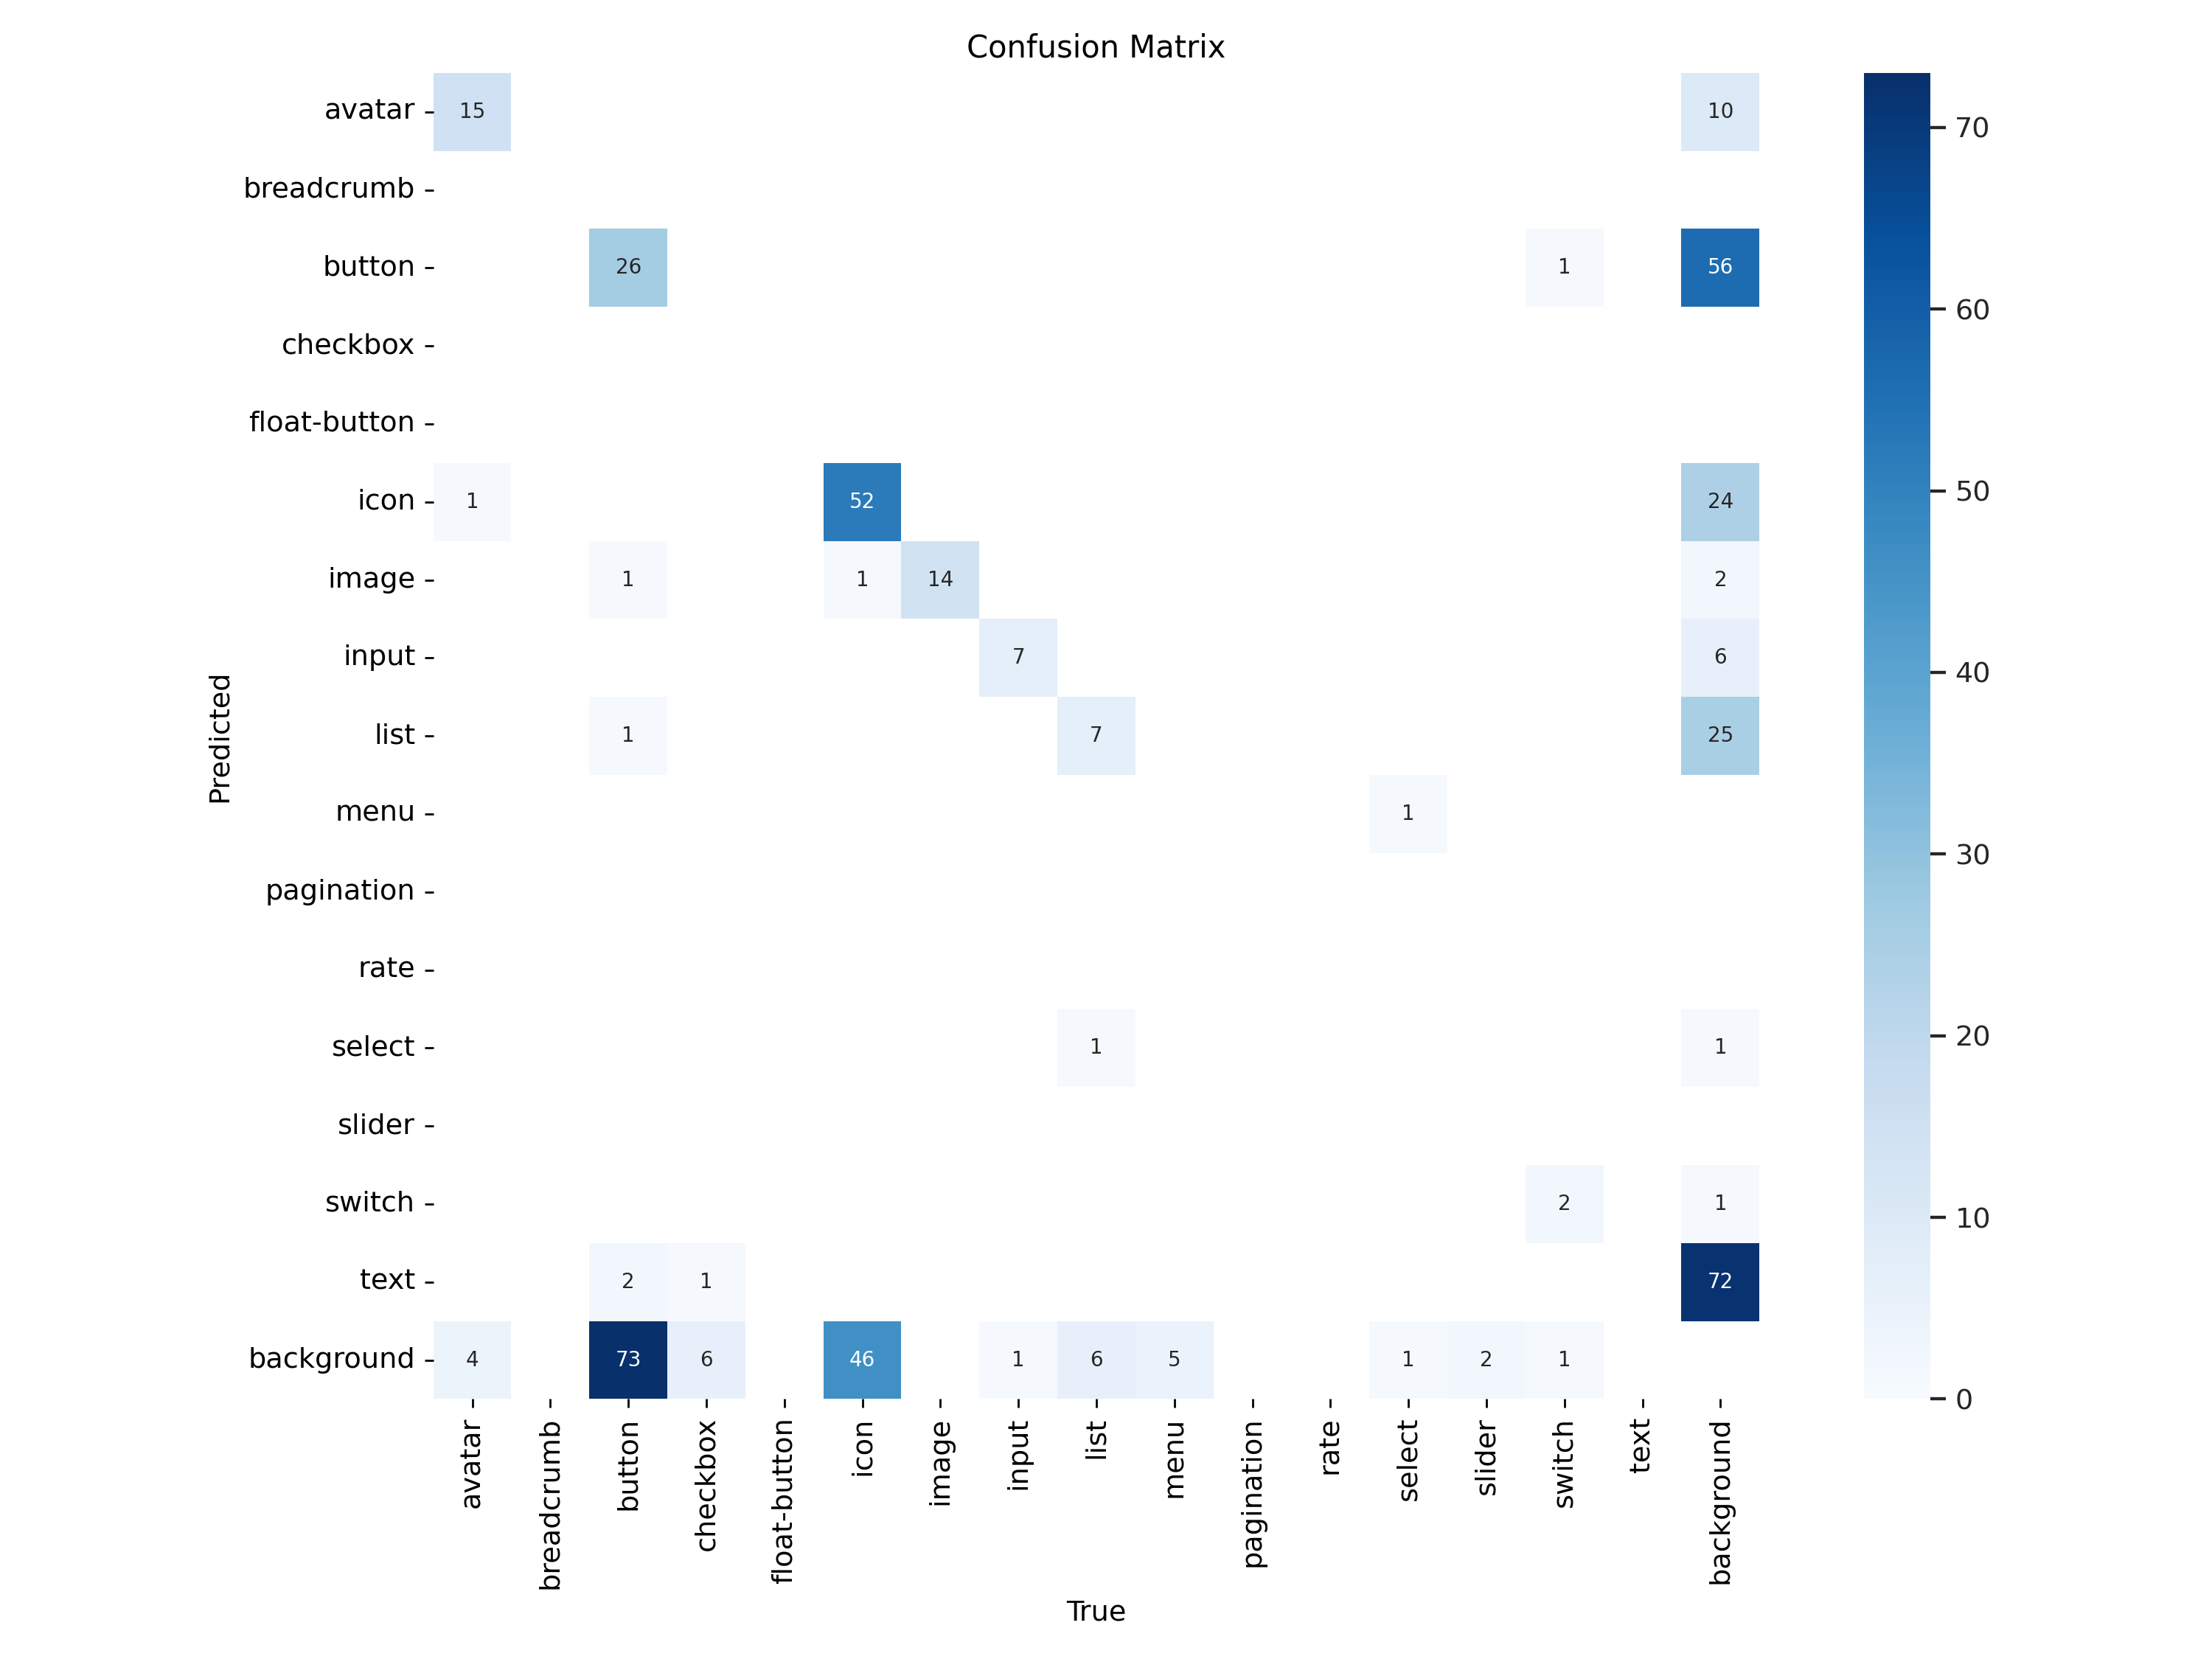

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

/mnt/hardDisk1/fay


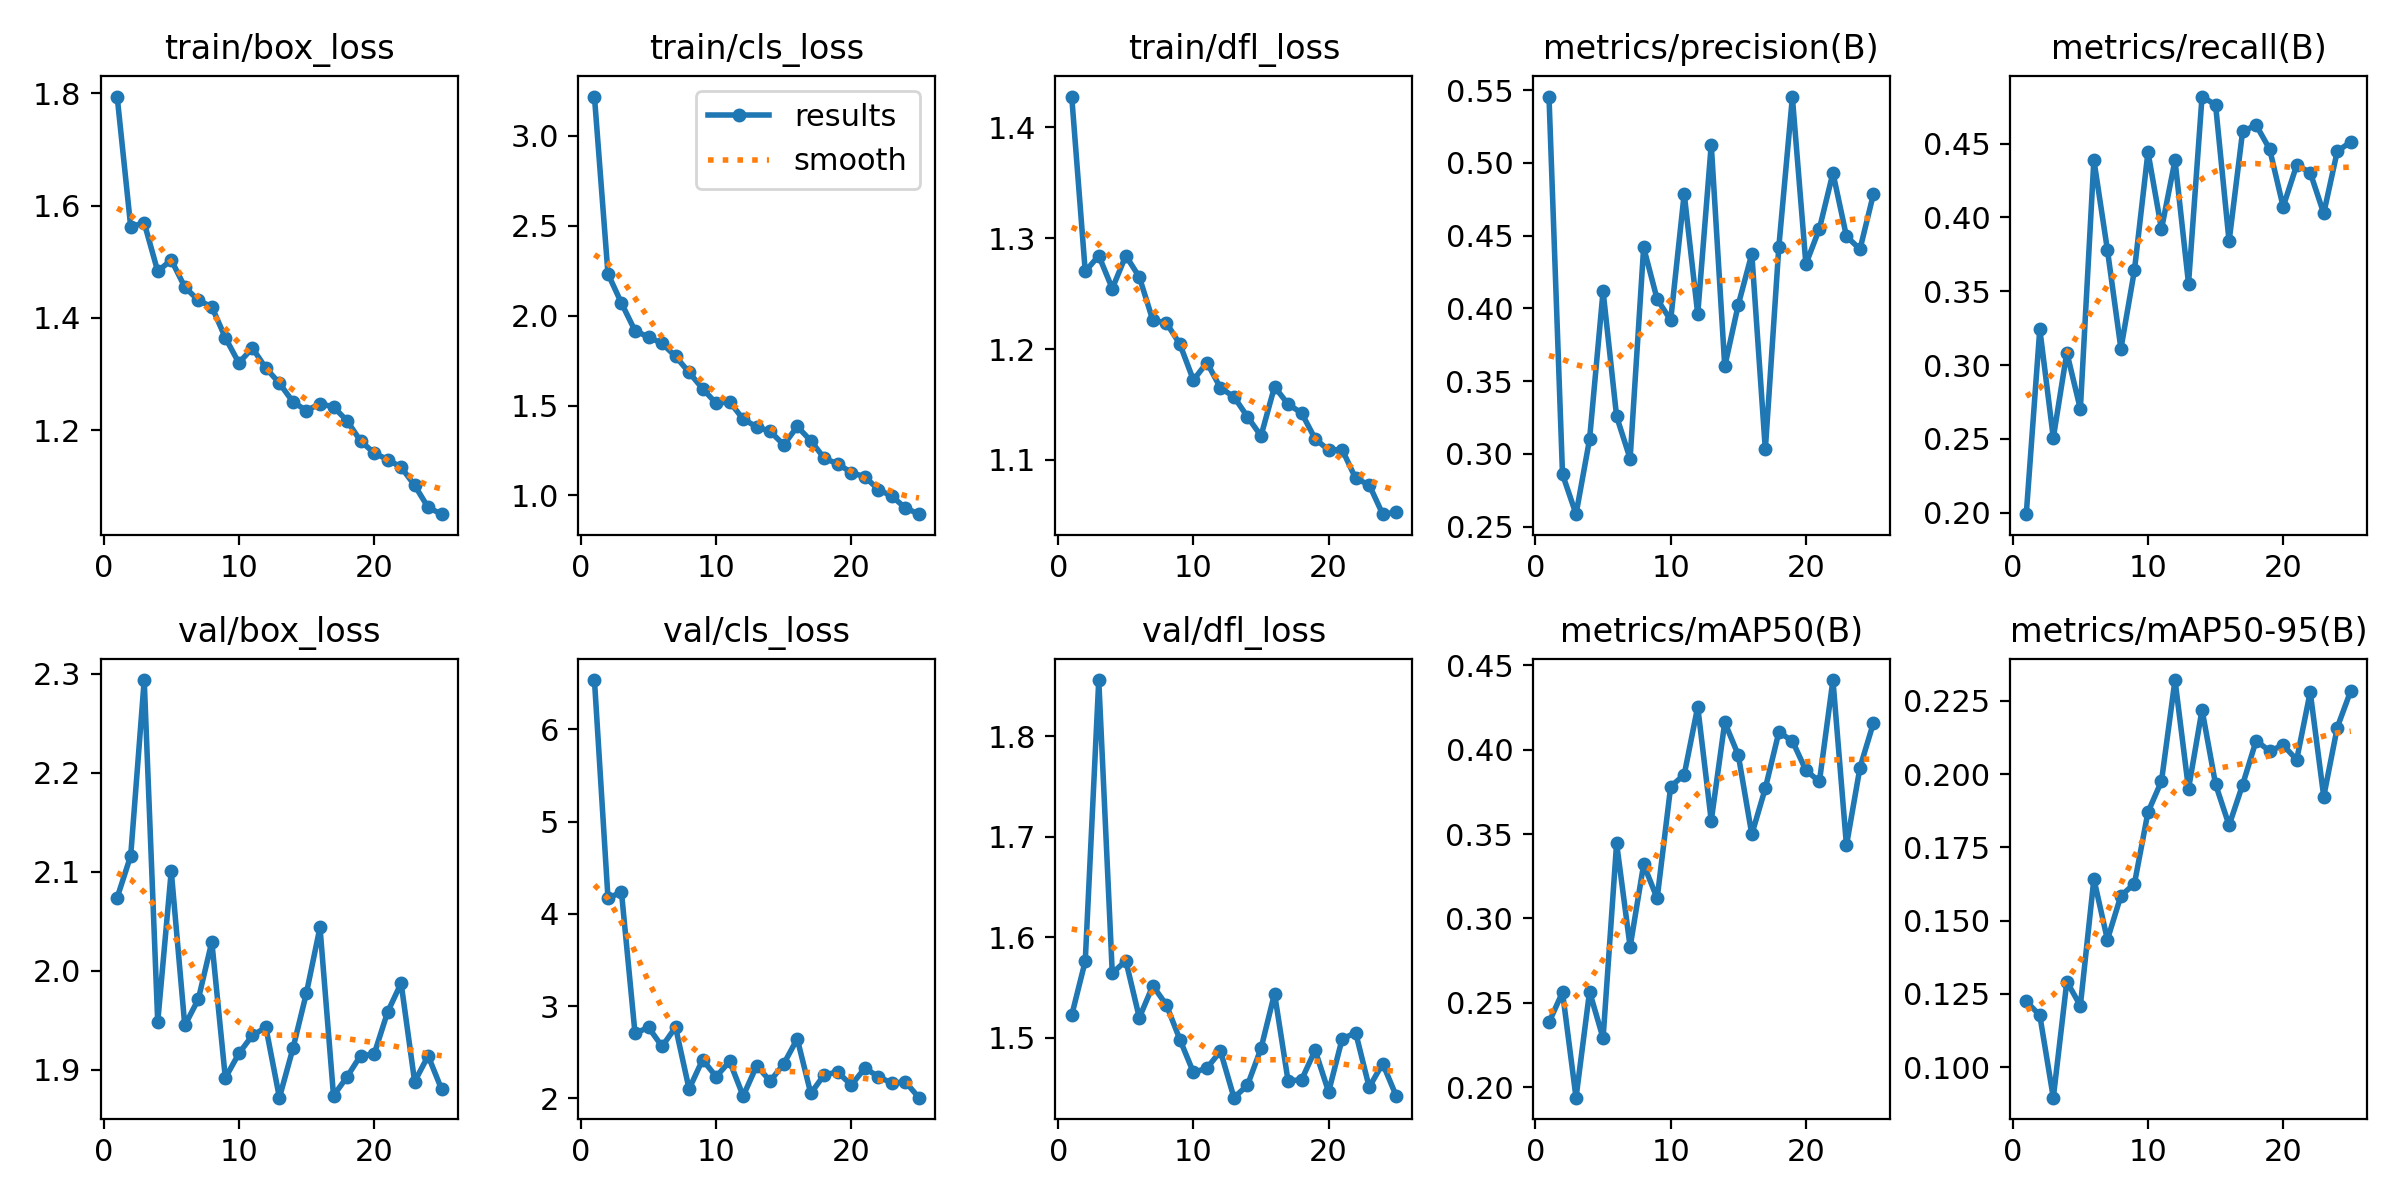

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

/mnt/hardDisk1/fay


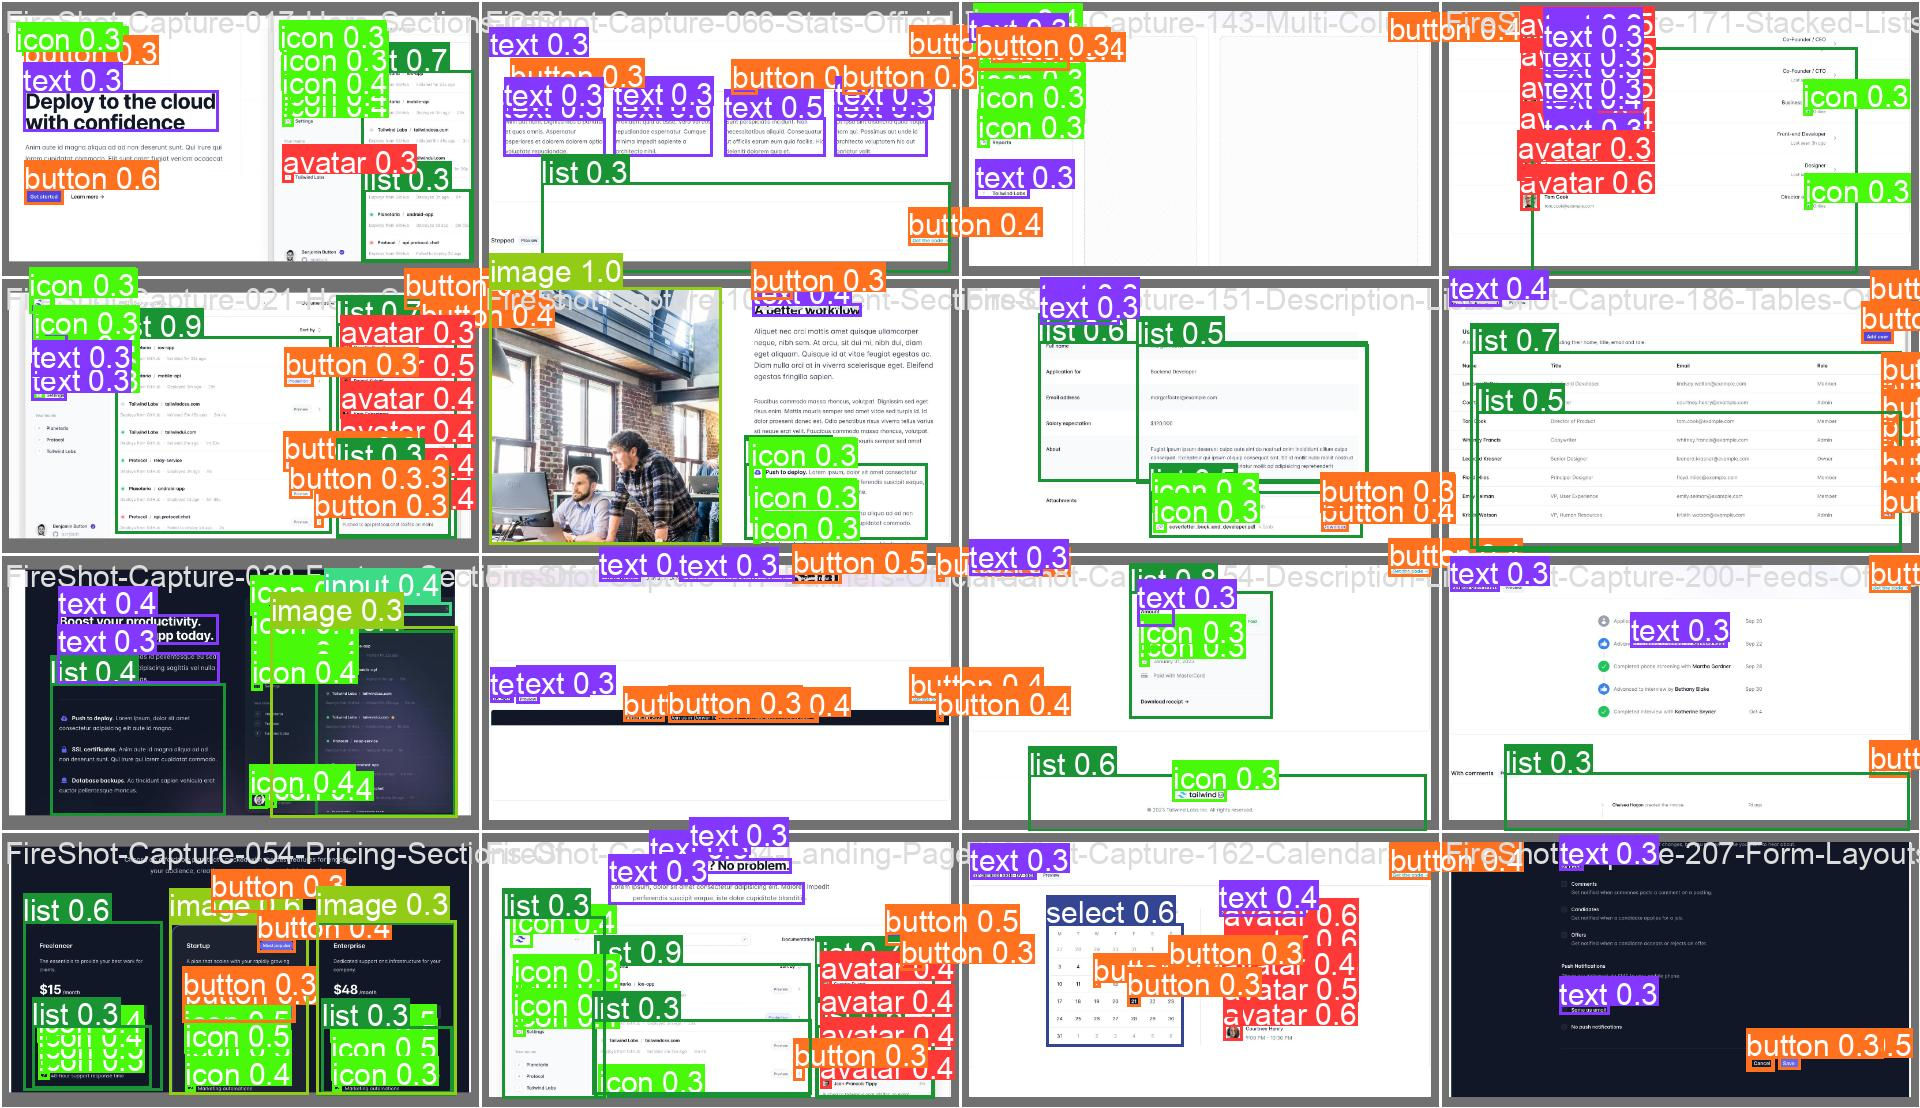

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=1600)

## Validate Custom Model

In [20]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

/mnt/hardDisk1/fay
Ultralytics YOLOv8.0.196 🚀 Python-3.11.5 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)
Model summary (fused): 268 layers, 43618944 parameters, 0 gradients, 164.9 GFLOPs
val: Scanning /mnt/hardDisk1/fay/datasets/webelement-3/valid/labels.cache... 23 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         23        278      0.396      0.441      0.426      0.233
                avatar         23         20      0.531        0.7      0.724        0.3
                button         23        103      0.297       0.32      0.245     0.0869
              checkbox         23          7          1          0      0.358      0.234
                  icon         23         99      0.619      0.556      0.597      0.193
                 image         23         14      0.759          1      0.986      0.777
                 input         23          8      0.485      0.875      0.828      0.533
            

## Inference with Custom Model

In [21]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/mnt/hardDisk1/fay
Ultralytics YOLOv8.0.196 🚀 Python-3.11.5 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)
Model summary (fused): 268 layers, 43618944 parameters, 0 gradients, 164.9 GFLOPs

image 1/12 /mnt/hardDisk1/fay/datasets/webelement-3/test/images/FireShot-Capture-005-Rico-Proceedings-of-the-30th-Annual-ACM-Symposium-on-User-Interface_-dl-acm-org_png.rf.1351970c1f81d05a5271b750c9c5556d.jpg: 448x800 1 avatar, 9 buttons, 3 images, 1 text, 74.9ms
image 2/12 /mnt/hardDisk1/fay/datasets/webelement-3/test/images/FireShot-Capture-006-bilibili-www-bilibili-com_png.rf.fd489ea66bd04c8aa416d881b257c07e.jpg: 448x800 26 buttons, 3 icons, 9 images, 12.1ms
image 3/12 /mnt/hardDisk1/fay/datasets/webelement-3/test/images/FireShot-Capture-015-Hero-Sections-Official-Tailwind-CSS-UI-Components-tailwindui-com_png.rf.7a063dcf7d2e2c25529488a0b607bbae.jpg: 448x800 4 buttons, 1 icon, 12.1ms
image 4/12 /mnt/hardDisk1/fay/datasets/webelement-3/test/images/FireShot-Capture-028-Feature-Sections

**NOTE:** Let's take a look at few results.

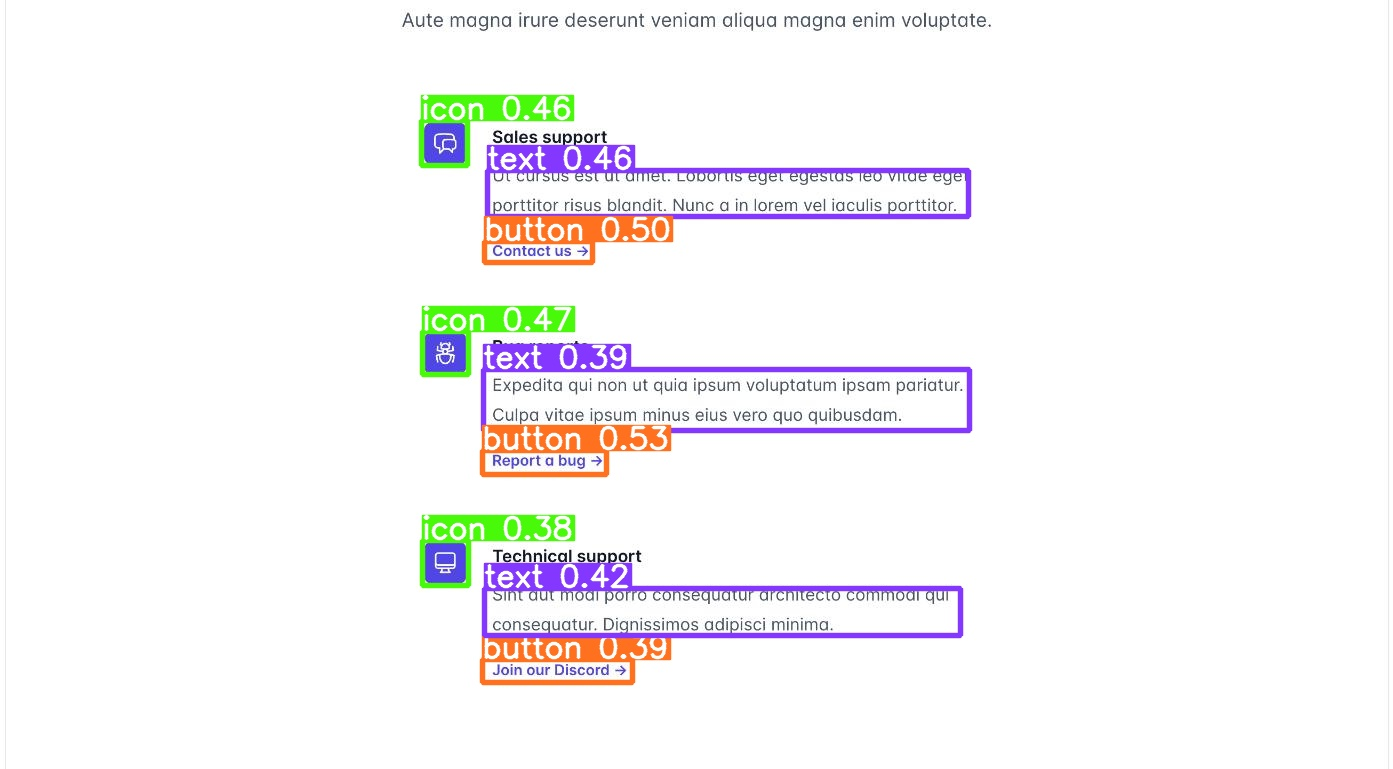

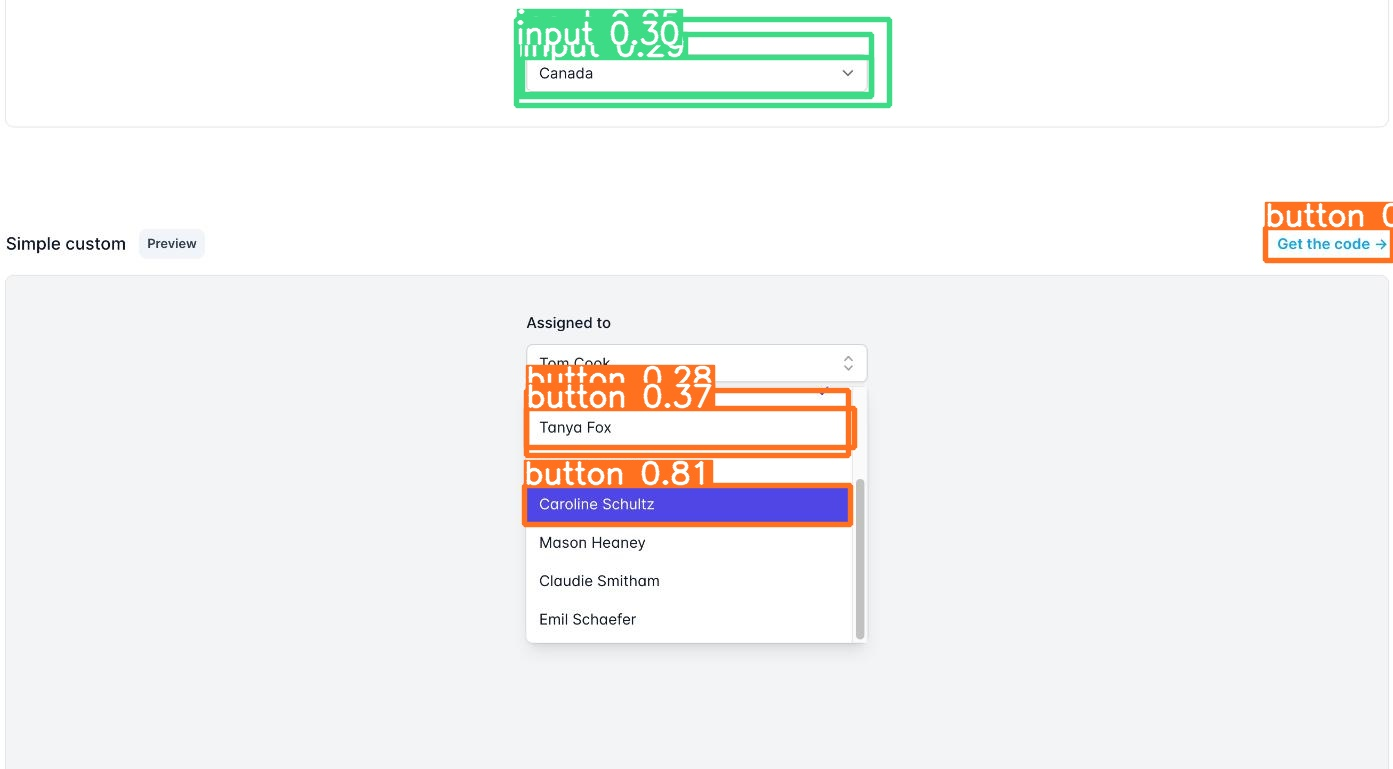

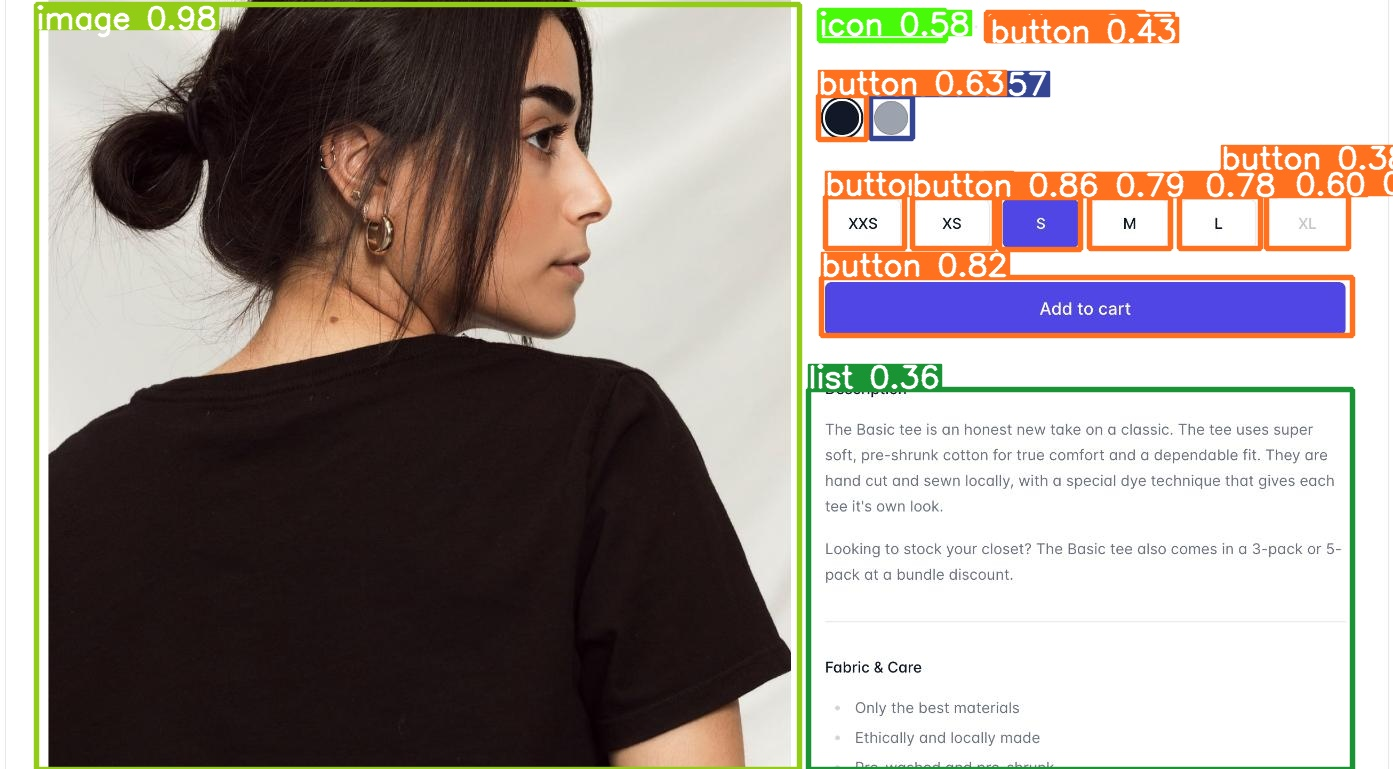

In [23]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")